# Image Tagging

### Problem Statement

Use Google's pre-trained MobileNet model to predict lables on a new image.

### Load data

In [8]:
from tensorflow import keras
import tensorflow_hub as hub

# location of the saved model 
mobilenet_model = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4'

# define the model
mnet = keras.Sequential([hub.KerasLayer(mobilenet_model, 
                                        output_shape=[1001],
                                        input_shape=(224, 224, 3))])

* Source:
    * [TensorFlow Hub: tf2-preview/mobilenet_v2/classification](https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4)

### Download an image

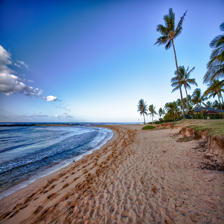

In [39]:
import requests
from PIL import Image
from io import BytesIO

# specify an image url
image_url = 'https://cdn.onlyinyourstate.com/wp-content/uploads/2015/06/Poipu.jpg'

# get the image
response = requests.get(image_url)

# load the image
image = Image.open(BytesIO(response.content)).resize([224, 224])

image

### Prepare image for scoring

In [47]:
# normalize the pixel values
import numpy as np

image_array = np.array(image) / 255
image_array.shape

(224, 224, 3)

In [51]:
# reshape the image
from tensorflow import reshape
    
image_array = reshape(image_array, [1, image_array.shape[0], image_array.shape[1], image_array.shape[2]])
image_array.shape

### Predict (identify) tags

In [55]:
# make predictions
probs = mnet.predict(image_array)
probs

array([[ 0.19770434,  0.03640665, -0.05598418, ..., -1.2746489 ,
         3.2109802 , -0.68748736]], dtype=float32)

In [ ]:
# download the file that contains lable texts
labels_file = "https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt"
downloaded_file = keras.utils.get_file('labels.txt', origin=labels_file)

In [54]:
# read the lables
classes = []
i = 0
with open(downloaded_file) as f:
    labels = f.readlines()
    classes = [l.strip() for l in labels[1:]]
    i += 1
    
classes[:5]

16384/10484 [==============================================] - 0s 0us/step


['tench', 'goldfish', 'great white shark', 'tiger shark', 'hammerhead']

### Top-5 tags

In [58]:
# sort the predicted probabilites and grab the top five predicted lables
from tensorflow import argsort

top_5 = argsort(probs, axis=-1, direction='DESCENDING')[0][:5].numpy()
np_classes = np.array(classes)

In [ ]:
#probabilities = tf.nn.softmax(classifier(image)).numpy()

(1)  978 - seashore: 11.801043510437012
(2)  977 - sandbar: 11.14427661895752
(3)  975 - lakeside: 7.401078224182129
(4)  976 - promontory: 5.203141212463379
(5)  460 - breakwater: 4.672635078430176


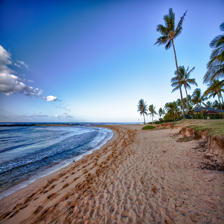

In [63]:
# print the top five predicted lables
for i, item in enumerate(top_5):
    class_index = item - 1
    line = f'({i+1}) {class_index:4} - {classes[class_index]}: {probs[0][top_5][i]}'
    print(line)
    
image

## Exercises:

Test the model with other images. Notice the size (pixels) of these images. Does the model work better with images that have higher resolutions? Lower the resolution of an image (i.e., resize the image) and rescore it to see how image resolution impacts model accuracy.